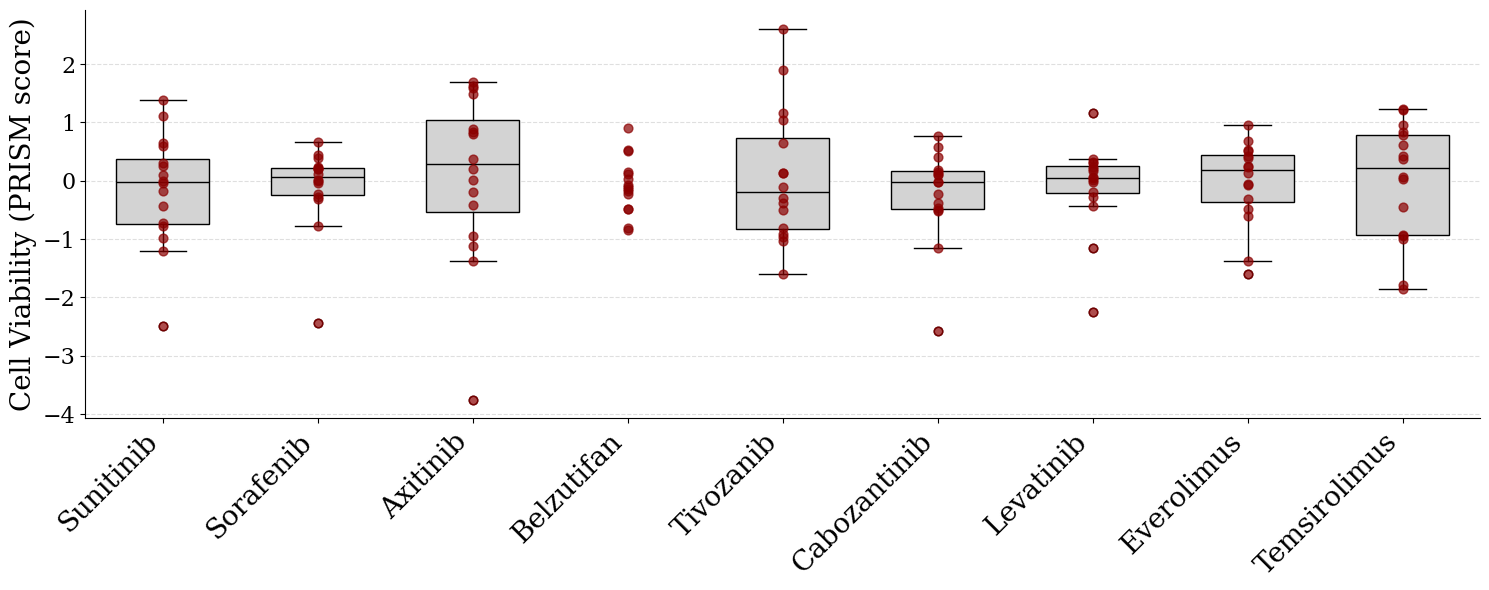

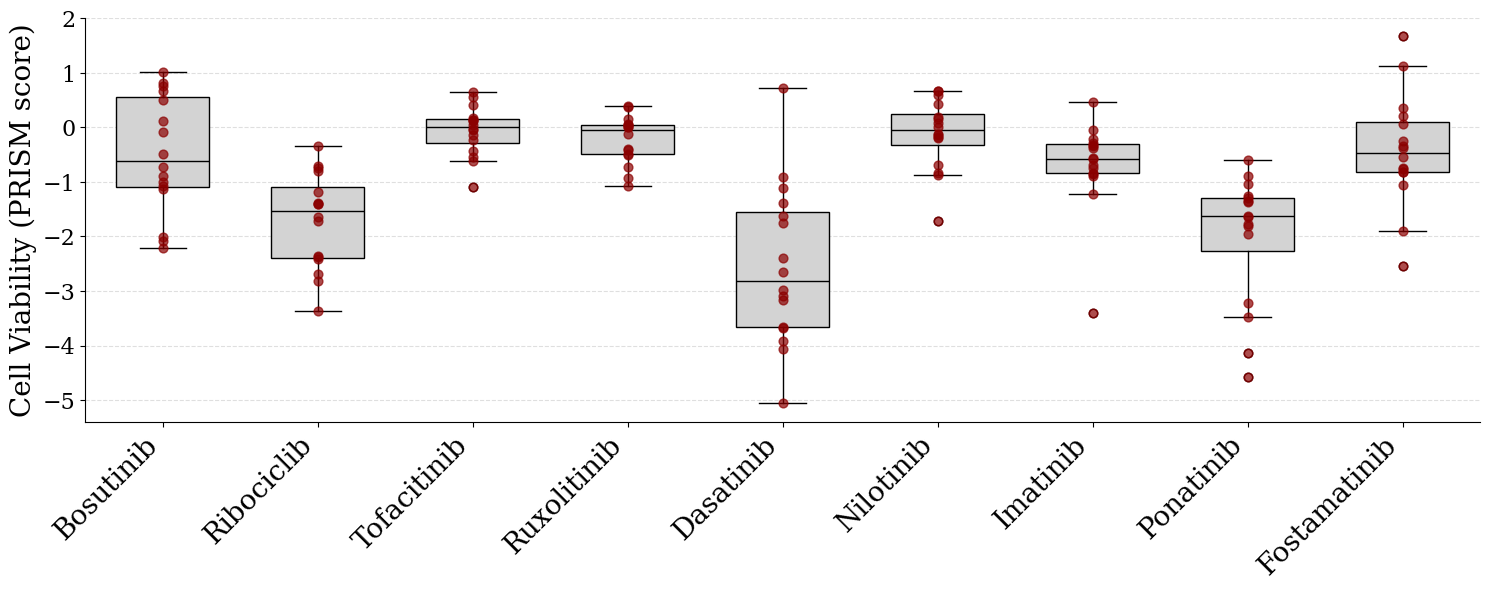

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data_file="/data/sr933/DEPMAP/Repurposing_Public_24Q2_Extended_Primary_Data_Matrix.csv"
df = pd.read_csv(data_file)

# Ensure the first column is named 'Name'
df.columns.values[0] = "Name"

approved_drugs={
       "Sunitinib": "BRD:BRD-K42828737-044-09-0",
       "Sorafenib": "BRD:BRD-K23984367-075-15-2",
       "Axitinib": "BRD:BRD-K29905972-001-06-3",
       "Belzutifan": "BRD:BRD-K00091288-001-01-9",
       "Tivozanib": "BRD:BRD-K53414658-001-08-2",
       "Cabozantinib": "BRD:BRD-K51544265-001-04-2",
       "Levatinib": "BRD:BRD-K39974922-001-04-3",
       "Everolimus": "BRD:BRD-K13514097-001-05-3",
        "Temsirolimus": "BRD:BRD-A79768653-001-12-0"
        }

proposed_drugs={
        "Bosutinib": "BRD:BRD-K99964838-001-11-9",
        "Ribociclib": "BRD:BRD-K36788280-001-01-2",
        "Tofacitinib": "BRD:BRD-K31283835-048-04-4",
        "Ruxolitinib": "BRD:BRD-K53972329-001-07-0",
        "Dasatinib": "BRD:BRD-K49328571-001-15-0",
        "Nilotinib": "BRD:BRD-K81528515-001-13-8",
        "Imatinib": "BRD:BRD-K92723993-001-06-7",
        "Ponatinib": "BRD:BRD-K44227013-001-06-4",
        "Fostamatinib": "BRD:BRD-K85178109-001-02-3"
       }

  

cell_lines=["ACH-000046","ACH-000411", "ACH-000457", "ACH-000189", "ACH-000313", "ACH-000433", "ACH-000495", "ACH-000684", "ACH-000159", "ACH-000484", "ACH-000250", "ACH-000484", "ACH-000555", "ACH-000375", "ACH-000429", "ACH-000649", "ACH-000792"]

# Filter the dataframe to include only the specified cell lines and drug names
filtered_df = df[df.columns.intersection(["Name"] + cell_lines)]
filtered_df = filtered_df.set_index("Name")

# Combine approved and proposed drugs into a single dictionary
all_drugs = {**approved_drugs, **proposed_drugs}

# Filter the dataframe to include only the approved drugs
approved_drugs_df = filtered_df.loc[filtered_df.index.intersection(approved_drugs.values())]
params = {
            "ytick.color": "black",
            "xtick.color": "black",
            "axes.labelcolor": "black",
            "axes.edgecolor": "black",
            "text.usetex": False,
            "font.family": "serif",
            "font.sans-serif": "Helvetica",
        }
plt.rcParams.update(params)
def plot_drugs(drug_dict, filtered_df, title):
    """Nature-style box and scatter plot for drug sensitivity."""
    fig, ax = plt.subplots(figsize=(15, 6))
    drug_positions = []
    scatter_data = []
    scatter_labels = []

    for i, (drug, brd) in enumerate(drug_dict.items()):
        if brd in filtered_df.index:
            drug_data = filtered_df.loc[brd]
            drug_positions.extend([i] * len(drug_data))
            scatter_data.extend(drug_data)
            scatter_labels.append(drug)

            # Plot boxplot
            ax.boxplot(drug_data, positions=[i], widths=0.6, patch_artist=True,
                       boxprops=dict(facecolor='lightgray', color='black'),
                       medianprops=dict(color='black'))

    # Overlay scatter points
    ax.scatter(drug_positions, scatter_data, alpha=0.7, color='darkred', s=40, zorder=3)

    # Aesthetic cleanup
    ax.set_ylabel("Cell Viability (PRISM score)", fontsize=20)
    ax.set_xticks(range(len(drug_dict)))
    ax.set_xticklabels(drug_dict.keys(), rotation=45, ha='right', fontsize=20)
    ax.tick_params(axis='y', labelsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.set_title(title.replace("_", " "), fontsize=22, pad=20)

    # Grid and layout
    ax.yaxis.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()

    # Save as high-resolution PNG and PDF
    plt.savefig(f"/home/sr933/output/{title}.pdf", bbox_inches='tight', dpi=900)
    plt.savefig(f"/home/sr933/output/{title}.png", bbox_inches='tight', dpi=900)
    plt.show()


# Plot for approved drugs
plot_drugs(approved_drugs, approved_drugs_df, "Approved_Drugs")

# Filter the dataframe to include only the proposed drugs
proposed_drugs_df = filtered_df.loc[filtered_df.index.intersection(proposed_drugs.values())]

# Plot for proposed drugs
plot_drugs(proposed_drugs, proposed_drugs_df, "Proposed_Drugs")


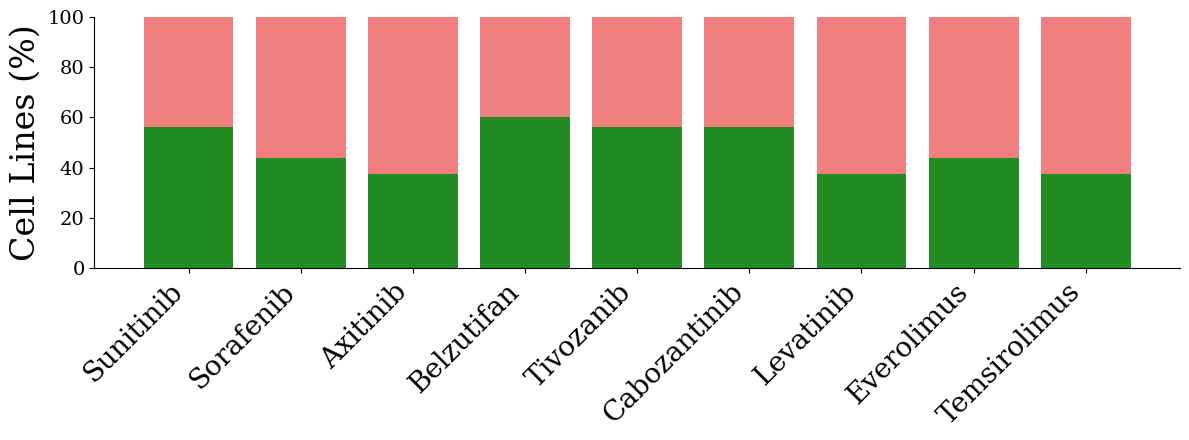

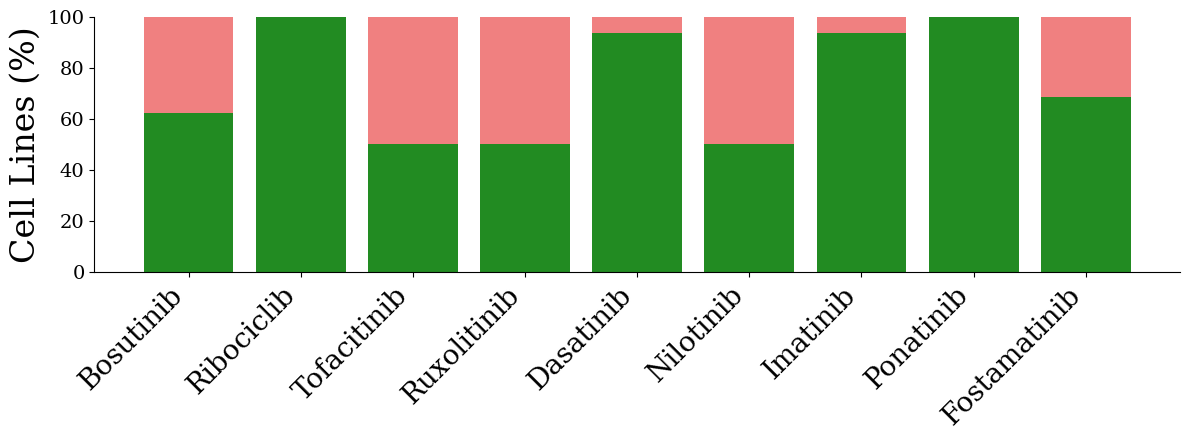

In [13]:
def plot_stacked_bar(drug_dict, filtered_df, title):
    """Nature-style stacked bar chart: % of cell lines inhibited (score < 0)."""
    below_zero = []
    above_zero = []

    for drug, brd in drug_dict.items():
        if brd in filtered_df.index:
            drug_data = filtered_df.loc[brd].dropna()  # Remove NaNs

            if len(drug_data) == 0:
                below_zero.append(0)
                above_zero.append(0)
                continue

            below = (drug_data < 0).sum() / len(drug_data) * 100
            below = round(below, 2)
            above = 100 - below  # Ensure total is 100
            below_zero.append(below)
            above_zero.append(above)

    # Plot
    fig, ax = plt.subplots(figsize=(12, 4.5))
    bar_width = 0.6
    x_positions = range(len(drug_dict))

    ax.bar(x_positions, below_zero, color='forestgreen', label='Inhibited (< 0)')
    ax.bar(x_positions, above_zero, bottom=below_zero, color='lightcoral', label='Non-inhibited (≥ 0)')

    ax.set_ylabel("Cell Lines (%)", fontsize=24)
    ax.set_xticks(list(x_positions))
    ax.set_xticklabels(drug_dict.keys(), rotation=45, ha='right', fontsize=20)
    ax.tick_params(axis='y', labelsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.legend(fontsize=14, frameon=False, loc="upper right", title="Response", title_fontsize=15)

    ax.set_ylim(0, 100)
    plt.tight_layout()

    # Save outputs
    plt.savefig(f"/home/sr933/output/{title}.pdf", bbox_inches='tight', dpi=900)
    plt.savefig(f"/home/sr933/output/{title}.png", bbox_inches='tight', dpi=900)
    plt.show()


# Plot stacked bar chart for approved drugs
plot_stacked_bar(approved_drugs, approved_drugs_df, "Stacked_Bar_Chart_for_Approved_Drugs")

# Plot stacked bar chart for proposed drugs
plot_stacked_bar(proposed_drugs, proposed_drugs_df, "Stacked_Bar_Chart_for_Proposed_Drugs") 

In [20]:
from scipy.stats import mannwhitneyu

# Assuming `data` is a DataFrame with drug names as columns and their values
# Replace `data` with the actual DataFrame variable in your code

# Identify the drug with the lowest value in Plot 1
lowest_drug = approved_drugs_df.mean(axis=1).idxmin()  # Replace `.mean()` with the appropriate aggregation if needed
print(f"Drug with the lowest value in Plot 1: {lowest_drug}")
print(f"Lowest value: {approved_drugs_df.loc[lowest_drug].mean()}")
lowest_drug_values = filtered_df.loc[lowest_drug]

# Perform Mann-Whitney U test for each approved drug (row)
results = []
for drug in proposed_drugs_df.index:
    if drug != lowest_drug:
        stat, p_value = mannwhitneyu(filtered_df.loc[drug], lowest_drug_values, alternative='two-sided')
        results.append({'Drug': drug, 'Statistic': stat, 'P-Value': p_value})

# Convert results to a DataFrame and print
results_df = pd.DataFrame(results)

#Use the dictionary to create a new DataFrame with the drug names and their corresponding BRD IDs
approved_drugs_df2 = pd.DataFrame(list(approved_drugs.items()), columns=['Drug', 'BRD_ID'])
# Merge the results with the approved drugs DataFrame
merged_results = pd.merge(results_df, approved_drugs_df2, on='Drug', how='left')
# Print the merged DataFrame
print(merged_results)

#For the three lowest p-values, print the drug names and the lowest value
lowest_p_values = merged_results.nsmallest(3, 'P-Value')
for index, row in lowest_p_values.iterrows():
    drug_name = row['Drug']
    p_value = row['P-Value']
    print(f"Drug: {drug_name}, P-Value: {p_value}")
    print(f"Lowest value: {filtered_df.loc[drug_name].mean()}")


Drug with the lowest value in Plot 1: BRD:BRD-K51544265-001-04-2
Lowest value: -0.22360664609290626
                         Drug  Statistic   P-Value BRD_ID
0  BRD:BRD-K31283835-048-04-4      134.0  0.835784    NaN
1  BRD:BRD-K36788280-001-01-2       21.0  0.000060    NaN
2  BRD:BRD-K44227013-001-06-4       15.0  0.000022    NaN
3  BRD:BRD-K49328571-001-15-0       23.0  0.000082    NaN
4  BRD:BRD-K53972329-001-07-0      114.0  0.610892    NaN
5  BRD:BRD-K81528515-001-13-8      136.0  0.777432    NaN
6  BRD:BRD-K85178109-001-02-3       99.0  0.282763    NaN
7  BRD:BRD-K92723993-001-06-7       67.0  0.022597    NaN
8  BRD:BRD-K99964838-001-11-9      111.0  0.534029    NaN
Drug: BRD:BRD-K44227013-001-06-4, P-Value: 2.2351651746724244e-05
Lowest value: -2.000488394852
Drug: BRD:BRD-K36788280-001-01-2, P-Value: 5.973130942826547e-05
Lowest value: -1.7093141483605625
Drug: BRD:BRD-K49328571-001-15-0, P-Value: 8.199534855042336e-05
Lowest value: -2.542755926259
